## Image Averaging

Implemented in Python3 by Roberto Pontes

In [10]:
# Imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
import time


In [11]:

PATH = '/home/rpontes/Codes/PDI/3-Combining_Images/1-Image-Averaging-for-Noise-Redution/'

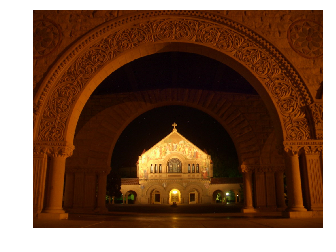

In [12]:
# Load image
image = cv.imread(PATH + 'quadnight.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.axis("off")
plt.imshow(image)

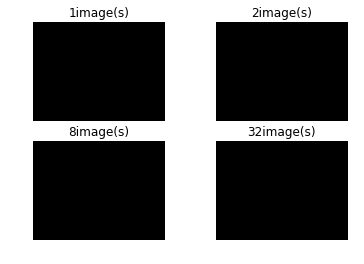

In [18]:
# Array with numbers of samples
nArray = [1, 2, 8, 32]

f, axarr = plt.subplots(2, 2)

ii = 0
ji = 0

for i in range(0, len(nArray), 1):
    nSample = nArray[i]
    avgImage = np.zeros(image.shape)
    
    for j in range(0, nSample, 1):
        pseudo_aleatory_seed = int(round((time.time() * 1000) % 100000))
        noisyImage = random_noise(image, mode='gaussian', 
                                  seed=pseudo_aleatory_seed, var=0.02)
        
        noisyImage
        avgImage += noisyImage
        
    avgImage /= nSample
    
    avgImage = avgImage.astype(np.uint8)
    
    # For plot images
    axarr[ii, ji].axis("off")
    axarr[ii, ji].set_title(str(nSample) + 'image(s)')
    axarr[ii, ji].imshow(avgImage)
    
    avgImageRGB = cv.cvtColor(avgImage, cv.COLOR_RGB2BGR)
    
    cv.imwrite(PATH + 'quadnight' + str(nSample) + '.jpg', avgImageRGB)
    
    ji += 1
    
    if ji == 2:
        ii += 1
        ji = 0